<a href="https://colab.research.google.com/github/Nutsudapenpong/DPDM/blob/master/Project_contrast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Ascaris' 

Mounted at /content/drive


In [58]:
import cv2 as cv
import os
from matplotlib import pyplot as plt

In [59]:
img = cv2.imread(os.path.join(path,'1.jpg'))

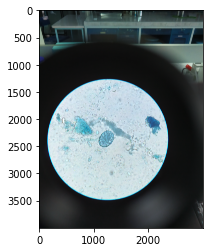

In [60]:
plt.imshow(img)

In [61]:
plt.savefig(r'original.png')

<Figure size 432x288 with 0 Axes>

In [62]:
img.shape

(4000, 3000, 3)

In [63]:
img

array([[[19, 21, 21],
        [27, 29, 29],
        [15, 18, 16],
        ...,
        [37, 56, 59],
        [43, 59, 65],
        [38, 54, 60]],

       [[28, 30, 30],
        [34, 36, 36],
        [19, 22, 20],
        ...,
        [30, 49, 52],
        [43, 60, 63],
        [44, 60, 66]],

       [[11, 14, 12],
        [17, 20, 18],
        [14, 17, 15],
        ...,
        [40, 57, 60],
        [39, 56, 59],
        [38, 55, 58]],

       ...,

       [[ 9, 10, 14],
        [ 8,  9, 13],
        [10,  9, 13],
        ...,
        [36, 37, 35],
        [37, 38, 36],
        [36, 37, 35]],

       [[10,  9, 13],
        [10,  9, 13],
        [11, 10, 14],
        ...,
        [36, 37, 35],
        [37, 38, 34],
        [38, 39, 35]],

       [[10,  9, 13],
        [11, 10, 14],
        [11, 10, 14],
        ...,
        [35, 36, 34],
        [36, 37, 33],
        [37, 38, 34]]], dtype=uint8)

In [64]:
histr = cv2.calcHist([img],[0],None,[256],[0,256])

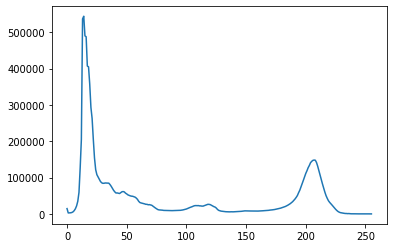

In [65]:
plt.plot(histr)

In [66]:
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

In [67]:
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

In [68]:
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

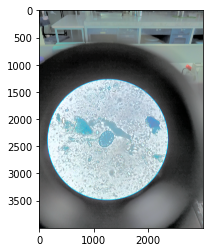

In [69]:
plt.imshow(img_output)

In [70]:
plt.savefig(r'opencv.png')

<Figure size 432x288 with 0 Axes>

In [71]:
histr1 = cv2.calcHist([img_output],[0],None,[256],[0,256])

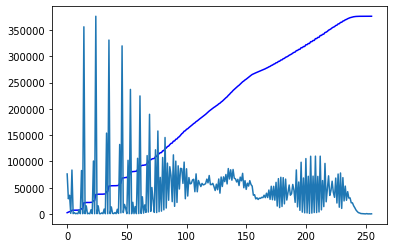

In [72]:
cdf = histr1.cumsum()
cdf_normalized = cdf * float(histr1.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.plot(histr1)

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure as ex
import imageio
import sys

def he(img):
    if(len(img.shape)==2):      #gray
        outImg = ex.equalize_hist(img[:,:])*255 
    elif(len(img.shape)==3):    #RGB
        outImg = np.zeros((img.shape[0],img.shape[1],3))
        for channel in range(img.shape[2]):
            outImg[:, :, channel] = ex.equalize_hist(img[:, :, channel])*255

    outImg[outImg>255] = 255
    outImg[outImg<0] = 0
    return outImg.astype(np.uint8)


In [74]:
img = he(img)

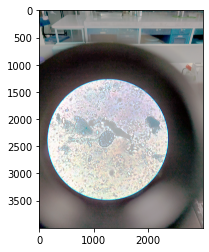

In [75]:
plt.imshow(img)

In [76]:
plt.savefig(r'non_opencv.png')

<Figure size 432x288 with 0 Axes>

In [77]:
histr2 = cv2.calcHist([img],[0],None,[256],[0,256])

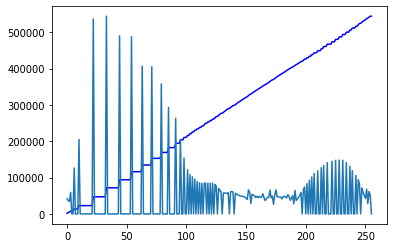

In [78]:
cdf = histr2.cumsum()
cdf_normalized = cdf * float(histr2.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.plot(histr2)